In [ ]:
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

# Objectives

1. To learn useful skills for further experiment
2. To learn overall workflow of a typical arificial intelligence project. 
3. To know how to use torchvision.transforms.



# Part1. Useful skills

In [ ]:
# Import the packages that need being controlled for reproducibility
import torch
import os
import numpy as np
import random as r

## Reproducibility

- What is reproducible? and why do we need to know?
- How to make your experiment reproducible?



Simple example to show randomness

In [ ]:
# In general seed PyTorch operations
torch.manual_seed(0)

In [ ]:
torch.randint(0, 10, (3,))

tensor([4, 9, 3])

### Reproducible Experiment

To make exactly same result of traing process, you need to know a lot more.

**Which things make randomness?**

- When you generate
- When you initialize
- When you shuffle, sample

More...
- When you use some packages..(maybe)
- When you use GPU
- Some operations on your machine..


In [ ]:
# Seed the behavior of the environment variable
os.environ['PYTHONHASHSEED'] = str(1)
# Seed numpy's instance in case you are using numpy's random number generator, shuffling operations, ...
np.random.seed(1)
# Seed Python's random number generator, in case you are using Python's random number generator, shuffling operations, ...
r.seed(1)

In [ ]:
# If you are using CUDA on 1 GPU, seed it
torch.cuda.manual_seed(0)
# If you are using CUDA on more than 1 GPU, seed them all
torch.cuda.manual_seed_all(0)
# Disable the inbuilt cudnn auto-tuner that finds the best algorithm to use for your hardware.
torch.backends.cudnn.benchmark = False
# Certain operations in Cudnn are not deterministic, and this line will force them to behave!
torch.backends.cudnn.deterministic = True

## Dataset & Dataloader

https://pytorch.org/tutorials/beginner/nn_tutorial.html

- Refactor using Dataset
- Refactor using Dataloader

### Batch training

From full-batch training to small-batch training

In [ ]:
data = load_somehow()

for epoch in range(nb_epochs):
    x, y = data
    # forward, backward, and so on..

In [ ]:
for epoch in range(nb_epochs):
    for batch in range(total_batches):
        x_batch, y_batch = smaller_data


Terms

- epoch = 1 forward and backward pass of ALL training samples

- batch_size = number of trainig samples in one forward & backward pass

- number of iterations = number of passes, each pass using "batch_size" number of samples

e.g. 100 samples, batch_size = 20 --> 100/20 = 5 iterations for 1 epoch

Additional referneces

- Why do we need batch training? \
https://datascience.stackexchange.com/questions/16807/why-mini-batch-size-is-better-than-one-single-batch-with-all-training-data

- Tradeoff between lower batch & higher batch \
https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network

### load_dataset()

In [ ]:
def load_dataset(dir_path="./sample_data/"):
    df_train=pd.read_csv('./sample_data/mnist_train_small.csv')
    df_test=pd.read_csv('./sample_data/mnist_test.csv')
    arr_train=df_train.to_numpy()
    arr_test=df_test.to_numpy()

    x_train=arr_train[:,1:]
    y_train=arr_train[:,:1]
    x_test=arr_test[:,1:]
    y_test=arr_test[:,:1]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_dataset(dir_path="./sample_data/")

xtr = torch.FloatTensor(x_train)
ytr = torch.LongTensor(y_train)
xte = torch.FloatTensor(x_test)
yte = torch.LongTensor(y_test)
ytr.squeeze_()
yte.squeeze_()

tensor([2, 1, 0,  ..., 4, 5, 6])

In [ ]:
xtr.shape

torch.Size([19999, 784])

### torch.utils.data.Dataset

TensorDataset

- Wrapping array type data to Dataset class

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
train = TensorDataset(xtr, ytr)
test = TensorDataset(xte, yte)

In [ ]:
data_by_idx = train[123]
x, y = data_by_idx
print(x.shape)

torch.Size([784])


In [ ]:
batch_by_idx = train[32:64]
batch_x, batch_y = batch_by_idx
print(batch_x.shape)

torch.Size([32, 784])


### Building your custom dataset

3 Things you must define 

```
__init__
__getitem__
__len__
```



In [ ]:
from torch.utils.data import Dataset

In [ ]:
# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class MNISTDataset(Dataset):
    def __init__(self, path):
        # Initialize data, download, etc.
        # read with numpy or pandas
        df=pd.read_csv(path)
        arr=df.to_numpy()
        self.n_samples = arr.shape[0]

        # here the first column is the class label, the rest are the features
        x=arr[:,1:]
        y=arr[:,:1]

        # you can do some preprocessing here as well

        self.x_data = torch.from_numpy(x) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(y) # size [n_samples, 1]

        self.y_data = self.y_data.type(torch.LongTensor)

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [ ]:
trainset = MNISTDataset('./sample_data/mnist_train_small.csv')
testset = MNISTDataset('./sample_data/mnist_test.csv')

In [ ]:
model, opt = define_somehow()

for epoch in range(epochs):
    for i in range(19999 // bs + 1):
        xb, yb = train_ds[i * bs: i * bs + bs]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

### torch.utils.data.DataLoader

DataLoader

In [ ]:
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size=32)

In [ ]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=train,
                          batch_size=4,
                          shuffle=True,
                          num_workers=0)
test_loader = DataLoader(dataset=test,
                          batch_size=4,
                          shuffle=True,
                          num_workers=0)

In [ ]:
# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
features, labels = data
print(features.shape, labels.shape)

torch.Size([4, 784]) torch.Size([4])


## Faster training

### Switch to CNN

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 16, kernel_size=3, stride=2, padding=1)
        self.fc1 = nn.Linear(1152, 256)
        self.fc2 = nn.Linear(256, 10)


    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.avg_pool2d(xb, 2)
        xb = F.relu(self.conv2(xb))
        xb = xb.view(-1, 1152)
        xb = F.relu(self.fc1(xb))
        xb = F.relu(self.fc2(xb))
        return xb

In [ ]:
x = torch.zeros(1, 1, 28, 28)
model = Mnist_CNN()
out = model(x)

### GPU

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.cuda.current_device()

0

In [ ]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
# Default CUDA device
device = torch.device('cuda')

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Allocate a tensor on default GPU
a = torch.tensor([1, 2], device=cuda)

In [ ]:
# Transfer a tensor from CPU to GPU
b = torch.tensor([3, 4])
b2 = b.cuda()
# or
c = torch.tensor([5, 6]).to(device=cuda)

In [ ]:
print(a + b2)

tensor([4, 6], device='cuda:0')


In [ ]:
print(a + b)

RuntimeError: ignored

In [ ]:
# Allocate your model on GPU
model = Mnist_CNN().to(device)

In [ ]:
torch.cuda.empty_cache()

# Exercise 1

In [ ]:
import numpy as np

def fit(model, loss_func, opt, train_dl, test_dl, device, gpu=False):
    model.train()
    train_loss = 0
    train_len = 0
    for xb, yb in train_dl:
        if gpu:
            xb, yb = xb.to(device), yb.to(device)
        loss = loss_func(model(xb), yb)
        train_loss += loss
        train_len += len(xb)

        loss.backward()
        opt.step()
        opt.zero_grad()
 
    tr_loss = train_loss / train_len

Q. You have given function above. Using the function **fit()**, Compare the time of triaining one epoch with/without gpu. 

- Choose loss function and optimizer as you want. But it should be identical in each case.
- You must place your model on gpu by .to()

In [ ]:
# training one epoch with gpu. don't forget to put your data, model on cuda device!

In [ ]:
model = Mnist_CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
% time _ = fit(model, criterion, optimizer, train_loader, test_loader, device, gpu=False)

CPU times: user 43.2 s, sys: 271 ms, total: 43.4 s
Wall time: 43.6 s


In [ ]:
model = Mnist_CNN()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
# training one epoch with gpu. don't forget to put your data, model on cuda device!
% time _ = fit(model, criterion, optimizer, train_loader, test_loader, device, gpu=True)

CPU times: user 11.6 s, sys: 230 ms, total: 11.9 s
Wall time: 12.1 s


# Part 2. Project Pipeline

## Add validation set

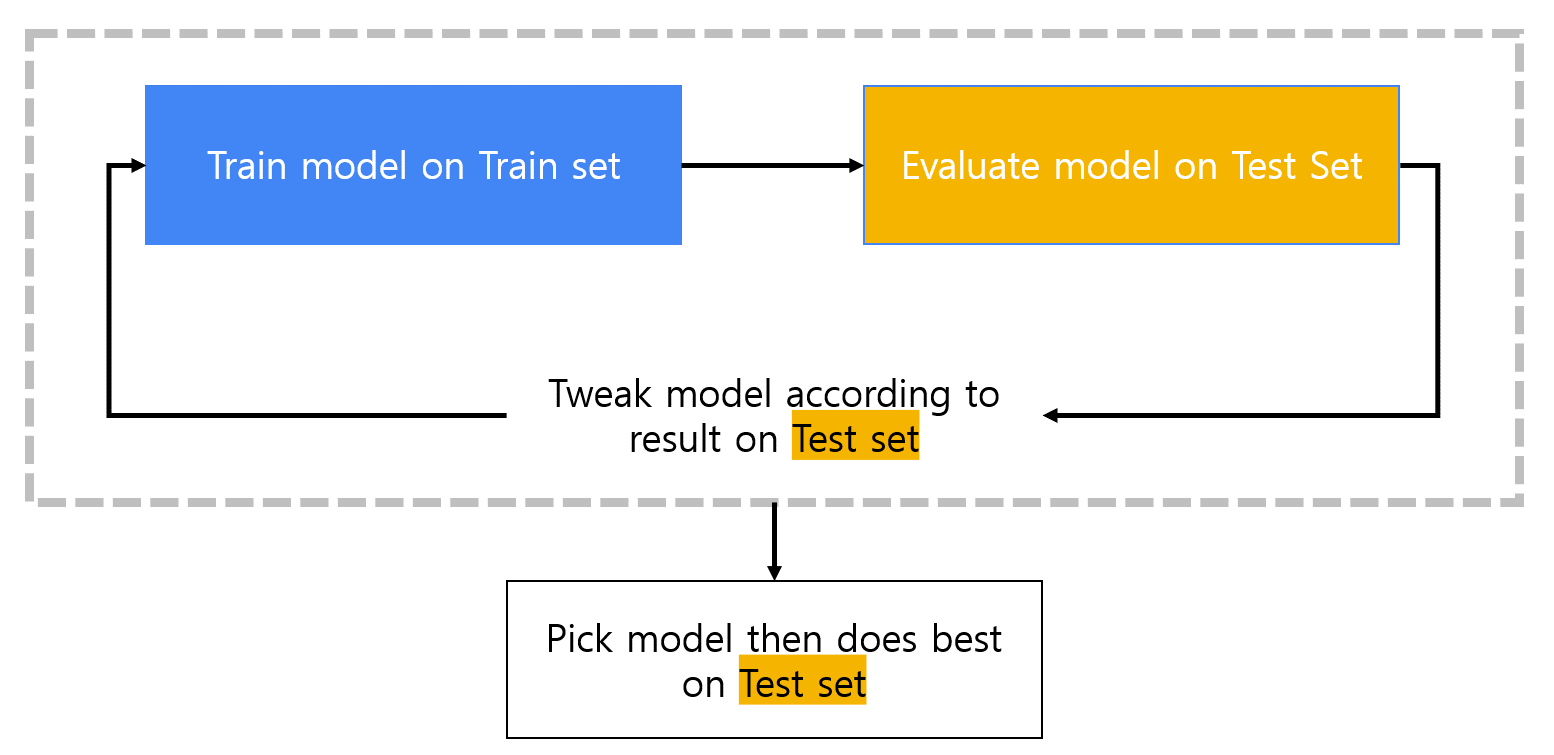

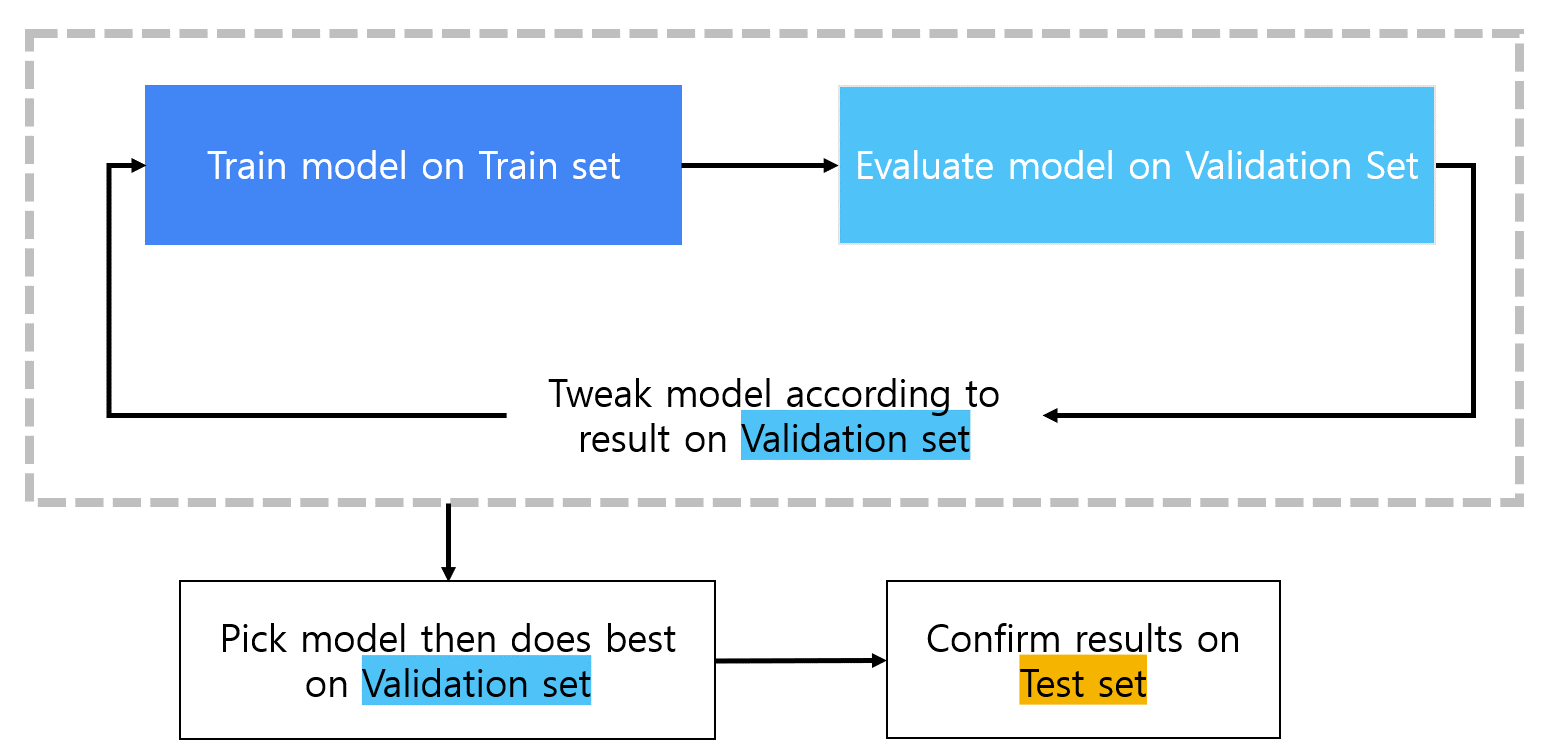

### Data split, Sampler

Easiest way - indexing

In [ ]:
len(xtr)

19999

In [ ]:
x_train, y_train = xtr[:15000], ytr[:15000]
x_valid, y_valid = xtr[15000:], ytr[15000:]

In [ ]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=4, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=4)

Using random_split()

In [ ]:
int(len(train) * 0.8)

15999

In [ ]:
tr, val = torch.utils.data.random_split(train, [int(len(train) * 0.8) + 1, int(len(train) * 0.2)])

print(tr)
print(len(tr))
print(val)
print(len(val))

16000
3999


Sampler

In [ ]:
indices = list(range(len(train)))

np.random.shuffle(indices)

print(indices)

[11455, 8110, 16829, 6398, 1544, 13586, 15591, 8202, 16967, 7806, 12497, 15574, 10446, 13428, 7083, 2401, 18284, 18333, 18057, 415, 9586, 4106, 14703, 4211, 7690, 13690, 11454, 3664, 18017, 5873, 6544, 9583, 17893, 15103, 6682, 14832, 19547, 5543, 12470, 19627, 4907, 3259, 644, 6479, 19714, 7659, 17877, 17274, 7839, 19004, 7238, 1841, 5592, 16668, 9984, 15652, 9807, 15739, 14376, 5985, 13601, 19684, 2247, 2655, 18846, 13826, 3525, 14290, 9957, 891, 2782, 1104, 10437, 12030, 19224, 8560, 10069, 2784, 3933, 16574, 14918, 2055, 4209, 4, 6283, 1332, 19696, 8402, 14090, 13152, 14624, 72, 3844, 18299, 1463, 2277, 18564, 3021, 11194, 9913, 12089, 15981, 596, 9264, 14458, 5804, 8760, 168, 19080, 2029, 2036, 12845, 9825, 343, 1916, 5296, 10359, 14323, 15074, 8244, 12314, 3148, 11558, 7201, 14188, 14725, 9754, 18149, 9323, 17639, 3832, 16147, 7969, 19229, 14274, 9261, 15046, 5065, 17530, 5810, 3000, 12529, 14704, 17426, 88, 8308, 16580, 19849, 3094, 5508, 10487, 9007, 9788, 16855, 14216, 18537, 

In [ ]:
int(np.floor(0.8 * len(train)))

15999

In [ ]:
split = int(np.floor(0.8 * len(train)))

tr_idx, val_idx = indices[:split], indices[split:]

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

tr_sampler = SubsetRandomSampler(tr_idx)
val_sampler = SubsetRandomSampler(val_idx)

In [ ]:
type(tr_sampler.indices)

list

In [ ]:
tr_sampler.indices[:20]

[11455,
 8110,
 16829,
 6398,
 1544,
 13586,
 15591,
 8202,
 16967,
 7806,
 12497,
 15574,
 10446,
 13428,
 7083,
 2401,
 18284,
 18333,
 18057,
 415]

### How do evaluate validation set

In [ ]:
# in training loop
for epoch in range(nb_epochs):

    # training process

    # starts validation process
    model.eval()
    correct = 0 
    total = 0

    with torch.no_grad():
        for data in validloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # print validation loss

## Save & Load

https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html

In [ ]:
torch.save(model.state_dict(), './model.pt')

In [ ]:
print('state_dict format of the model: {}'.format(model.state_dict()))

In [ ]:
new_model = Mnist_CNN()
new_model.load_state_dict(torch.load('./model.pt'))
new_model.to(cuda)
new_model.eval()

test_acc: 39.644 %


test your model


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def visualize_model(model, device, test_loader, num_images=6):
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(preds[j]))
                img = inputs.cpu().data[j].view(28, 28)
                plt.imshow(img, cmap="gray")
            return

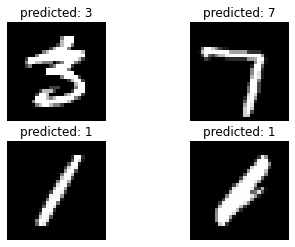

In [ ]:
visualize_model(net, device, test_loader)

# Exercise 2
 

Q. We have learned the most of process for modeling. Now please write code for the whole training pipeline. Follow the instructions below.

- Choose a model as you want.

- You need to split validation set from train set, and test set.
- Load dataset using MNISTDataset(), and use random_split() to split validation set. Build dataloader for each set.

- In training process, you have to use batch training.

- At every epoch, you need to print accuracy of training set, and loss. Also, you need to print accuracy of validation accuracy, and loss.

- You must define a variable called "best_valid_acc" vto save the performance of validation set. After calculating validation accuracy, if the model's performance is higher than best_valid_acc, save the model. 

- optimizer = SGD / loss = CrossEntropyLoss / bs = 4



In [ ]:
# 1. Define dataset

# 2. Split validation and train set

# 3. Define dataloaders

# 4. Define model, loss function, optimizer

# 5. Do training process

# Part3. Processing Image data

## Torchvision

### torchvision.datasets

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307, ),(0.3081, ))])

train_dataset = torchvision.datasets.MNIST('./mnist_data/',
                             download=True,
                             train=True,
                             transform=transform)

test_dataset = torchvision.datasets.MNIST("./mnist_data/",
                             download=False,
                             train=False,
                             transform= transform)

In [ ]:
# split train set / valid set
validation_ratio=0.1
random_seed= 17

num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(validation_ratio * num_train))

np.random.seed(random_seed)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          sampler=train_sampler, num_workers=2)
validloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          sampler=valid_sampler, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

### Transformation

Read PyTorch documentation for more information

(https://pytorch.org/docs/stable/torchvision/transforms.html)

Download a example image

In [ ]:
!wget https://i.pinimg.com/originals/21/ae/ae/21aeae8d2cae56289bd55665fb5d9b8f.jpg
!mv 21aeae8d2cae56289bd55665fb5d9b8f.jpg example.jpg
!rm 21aeae8d2cae56289bd55665fb5d9b8f.jpg

--2020-10-21 14:30:23--  https://i.pinimg.com/originals/21/ae/ae/21aeae8d2cae56289bd55665fb5d9b8f.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.120.84, 2a02:26f0:ce:2a2::1931, 2a02:26f0:ce:29c::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.120.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48642 (48K) [image/jpeg]
Saving to: ‘21aeae8d2cae56289bd55665fb5d9b8f.jpg’

21aeae8d2cae56289bd 100%[===================>]  47.50K  --.-KB/s    in 0.01s   

2020-10-21 14:30:23 (4.59 MB/s) - ‘21aeae8d2cae56289bd55665fb5d9b8f.jpg’ saved [48642/48642]

rm: cannot remove '21aeae8d2cae56289bd55665fb5d9b8f.jpg': No such file or directory


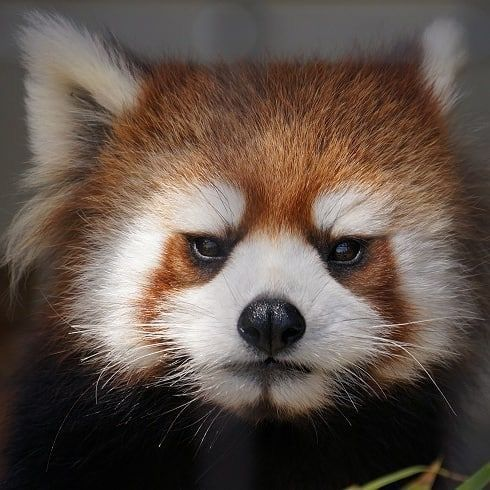

In [ ]:
from IPython.display import Image, display

display(Image(filename='example.jpg'))

In [ ]:
from PIL import Image as Img

im = Img.open('example.jpg')

print(im.size)

(490, 490)


In [ ]:
from torchvision import transforms

In [ ]:
trans = transforms.ToTensor()

x = trans(im)

In [ ]:
print(x.size())

torch.Size([3, 490, 490])


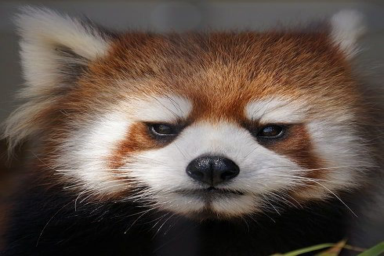

(384, 256)


In [ ]:
trans = transforms.Resize((256, 384))

resized = trans(im)

display(resized)
print(resized.size)

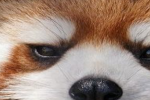

In [ ]:
trans = transforms.CenterCrop((100, 150))

newim = trans(resized)

display(newim)

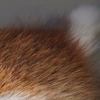

In [ ]:
trans = transforms.RandomCrop((100, 100), padding=30, padding_mode='constant')

newim = trans(resized)

display(newim)

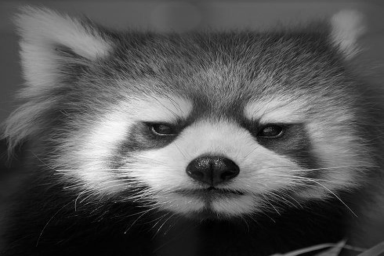

In [ ]:
trans = transforms.Grayscale()

newim = trans(resized)

display(newim)

In [ ]:
trans = transforms.ToTensor()

print(trans(newim).size())

torch.Size([1, 256, 384])


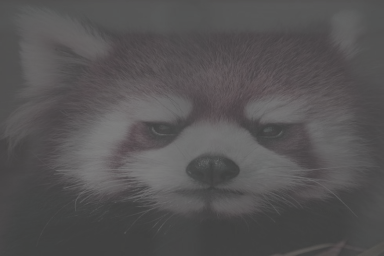

In [ ]:
trans = transforms.ColorJitter(brightness=0, contrast=3, saturation=6, hue=0.3)

newim = trans(resized)

display(newim)

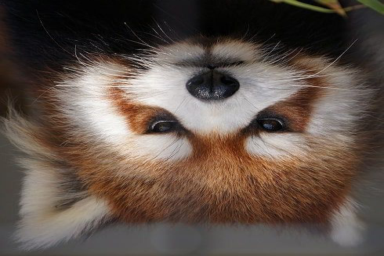

In [ ]:
trans = transforms.RandomVerticalFlip(p=1)

newim = trans(resized)

display(newim)

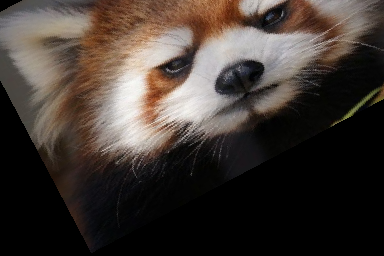

In [ ]:
trans = transforms.RandomRotation(degrees=40, center=(40, 70))

newim = trans(resized)

display(newim)

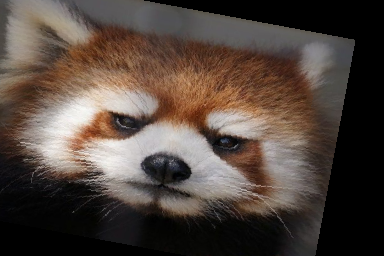

In [ ]:
trans = transforms.RandomAffine(degrees=20, translate=(0.2, 0.8), scale=(0.5, 1.5))

newim = trans(resized)

display(newim)

In [ ]:
trans = transforms.Resize((4, 6))

resized = trans(im)

trans = transforms.ToTensor()

x = trans(resized)

print(x[:2, :2])

tensor([[[0.4549, 0.4275, 0.3686, 0.3765, 0.3647, 0.3686],
         [0.4235, 0.5529, 0.5882, 0.5490, 0.5294, 0.3961]],

        [[0.4314, 0.3686, 0.2941, 0.2941, 0.2784, 0.3255],
         [0.3647, 0.4510, 0.4745, 0.4000, 0.4078, 0.3137]]])


In [ ]:
trans = transforms.Normalize(mean=(0.5, 0.3, 0.2), std=(0.5, 0.4, 0.5))

newx = trans(x)

print(newx[:2, :2])

tensor([[[-0.0902, -0.1451, -0.2627, -0.2471, -0.2706, -0.2627],
         [-0.1529,  0.1059,  0.1765,  0.0980,  0.0588, -0.2078]],

        [[ 0.3284,  0.1716, -0.0147, -0.0147, -0.0539,  0.0637],
         [ 0.1618,  0.3775,  0.4363,  0.2500,  0.2696,  0.0343]]])


In [ ]:
trans = transforms.RandomErasing(p=1, scale=(0.1, 0.3))

newx = trans(x)

print(newx[:2, :2])

tensor([[[0.4549, 0.4275, 0.3686, 0.0000, 0.0000, 0.0000],
         [0.4235, 0.5529, 0.5882, 0.0000, 0.0000, 0.0000]],

        [[0.4314, 0.3686, 0.2941, 0.0000, 0.0000, 0.0000],
         [0.3647, 0.4510, 0.4745, 0.0000, 0.0000, 0.0000]]])


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(),
    transforms.RandomAffine(degrees=20, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5)),
])

## Using transform to all images

https://www.kaggle.com/prasunroy/natural-images#

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OEGjBwRfozpn1vWf2uWtV6JUfMvBGhXn' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1OEGjBwRfozpn1vWf2uWtV6JUfMvBGhXn" -O natural_images.zip && rm -rf /tmp/cookies.txt  >/dev/null 2>&1
!mkdir natural_images/ 
!unzip natural_images.zip -d natural_images/ >/dev/null 2>&1

--2020-10-21 14:46:20--  https://docs.google.com/uc?export=download&confirm=O4m7&id=1OEGjBwRfozpn1vWf2uWtV6JUfMvBGhXn
Resolving docs.google.com (docs.google.com)... 74.125.133.139, 74.125.133.113, 74.125.133.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.133.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-2c-docs.googleusercontent.com/docs/securesc/fp3ierdn301ffc4f07cqoem94alun03i/i9o4125b0r4g2luk34i42543to9lear1/1603291575000/10000090644219567406/10386783912153961458Z/1OEGjBwRfozpn1vWf2uWtV6JUfMvBGhXn?e=download [following]
--2020-10-21 14:46:20--  https://doc-0k-2c-docs.googleusercontent.com/docs/securesc/fp3ierdn301ffc4f07cqoem94alun03i/i9o4125b0r4g2luk34i42543to9lear1/1603291575000/10000090644219567406/10386783912153961458Z/1OEGjBwRfozpn1vWf2uWtV6JUfMvBGhXn?e=download
Resolving doc-0k-2c-docs.googleusercontent.com (doc-0k-2c-docs.googleusercontent.com)... 66.102.1.132, 2a00:1450:400c:c06::84
Connecting t

In [ ]:
import torchvision

natural_img_dataset = torchvision.datasets.ImageFolder(root='./natural_images/', transform=transform)

In [ ]:
print(natural_img_dataset)
print(len(natural_img_dataset))
print(natural_img_dataset.classes)
print(natural_img_dataset.imgs)

Dataset ImageFolder
    Number of datapoints: 6899
    Root location: ./natural_images/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               RandomAffine(degrees=(-20, 20), translate=(0.1, 0.1))
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
6899
['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
[('./natural_images/airplane/airplane_0000.jpg', 0), ('./natural_images/airplane/airplane_0001.jpg', 0), ('./natural_images/airplane/airplane_0002.jpg', 0), ('./natural_images/airplane/airplane_0003.jpg', 0), ('./natural_images/airplane/airplane_0004.jpg', 0), ('./natural_images/airplane/airplane_0005.jpg', 0), ('./natural_images/airplane/airplane_0006.jpg', 0), ('./natural_images/airplane/airplane_0007.jpg', 0), ('./natural_images/airplane/airplane_0008.jpg', 0), ('./natural_images/airplane/airplane_0009.jpg',

In [ ]:
natural_img_dataset.class_to_idx

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

# About assignment

## EXAMPLE IMAGE

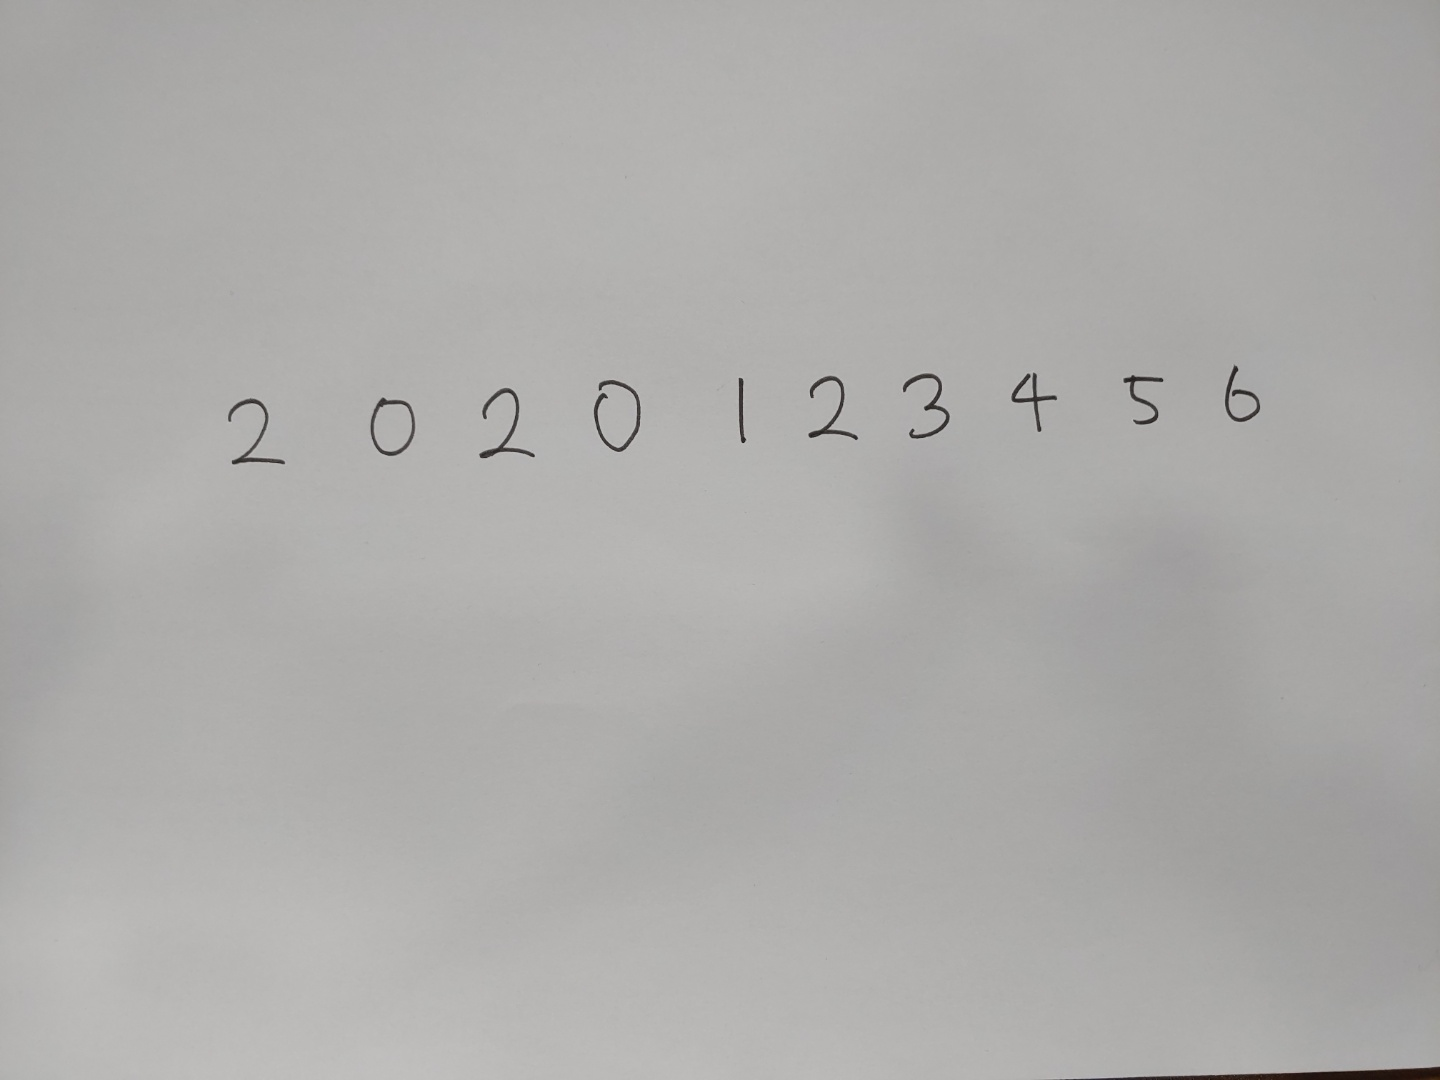

## Example Command

In [ ]:
!python 2020123456_조진욱.py mnist_test.jpg

2 0 2 0 1 2 3 4 5 6
